# Generate figures for chapter

This file generates and saves all the figures and tables in Chapter 1 of Political Geometry: Measuring Partisan Fairness. 

In [1]:
%run utilities
%run noninteractive_utilities  # Includes all the functions defined in the interactive notebooks


dpi = 200
mpl.rcParams['figure.dpi']= dpi


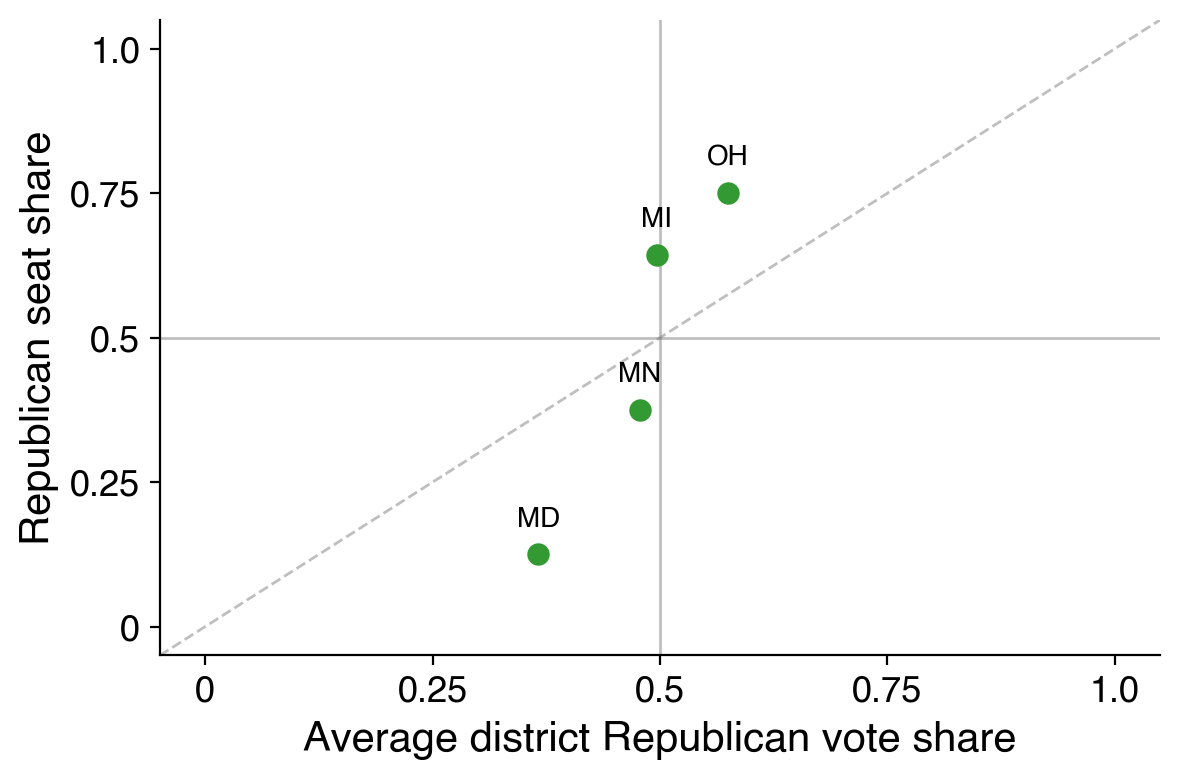

In [2]:
# Plot four elections on the seats-votes plane using MIT Elections Lab data

states = ["MD", "MN", "OH", "MI"]
year = 2016
vote_share_list = []
seat_share_list = []
point_label_list = []

for state in states:
    republican_votes_by_district, democrat_votes_by_district = get_two_party_votes(state, year) 
    
    total_vote_share_in_state = np.sum(republican_votes_by_district)/(np.sum(republican_votes_by_district) + np.sum(democrat_votes_by_district))
    
    republican_vote_share_by_district, democrat_vote_share_by_district = votes_to_shares_by_district(republican_votes_by_district, democrat_votes_by_district)
    average_district_vote_share, seat_share = district_vote_shares_to_vote_and_seat_shares(republican_vote_share_by_district)
    
    vote_share_list.append(average_district_vote_share)  # Change to total_vote_share_in_state to see the difference
    seat_share_list.append(seat_share)
    point_label_list.append(state)

plot_list_of_vote_and_seat_shares(vote_share_list,seat_share_list, regression=False, text='',point_labels=point_label_list)
plt.tight_layout()
plt.savefig("outputs/base_elections.png", dpi=500)


Slope of regression line: 2.821902213304027
Intercept of regression line: -0.8438420207118194


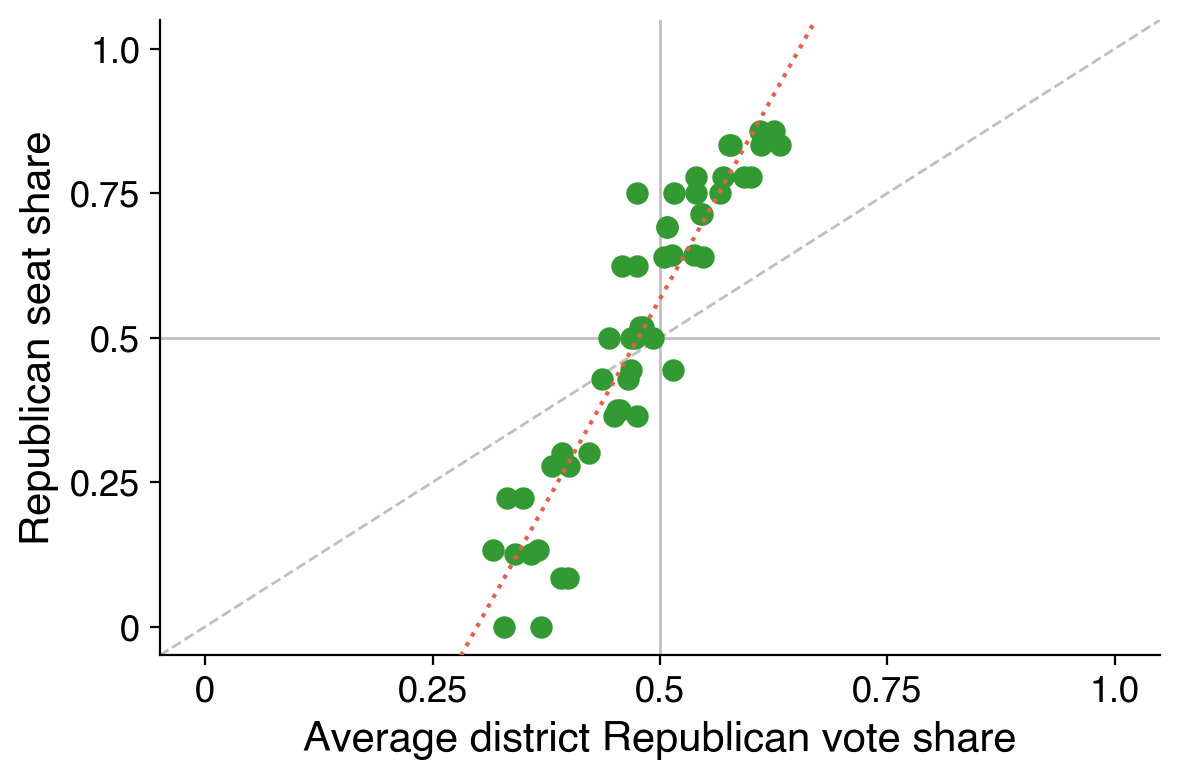

In [3]:
# Plot data from the Daily Kos breakdown of Presidential vote share by Congressional District

votes, seats = read_daily_kos_data()
plot_list_of_vote_and_seat_shares(votes, seats)
plt.tight_layout()
plt.savefig("outputs/daily_kos.png", dpi=500)


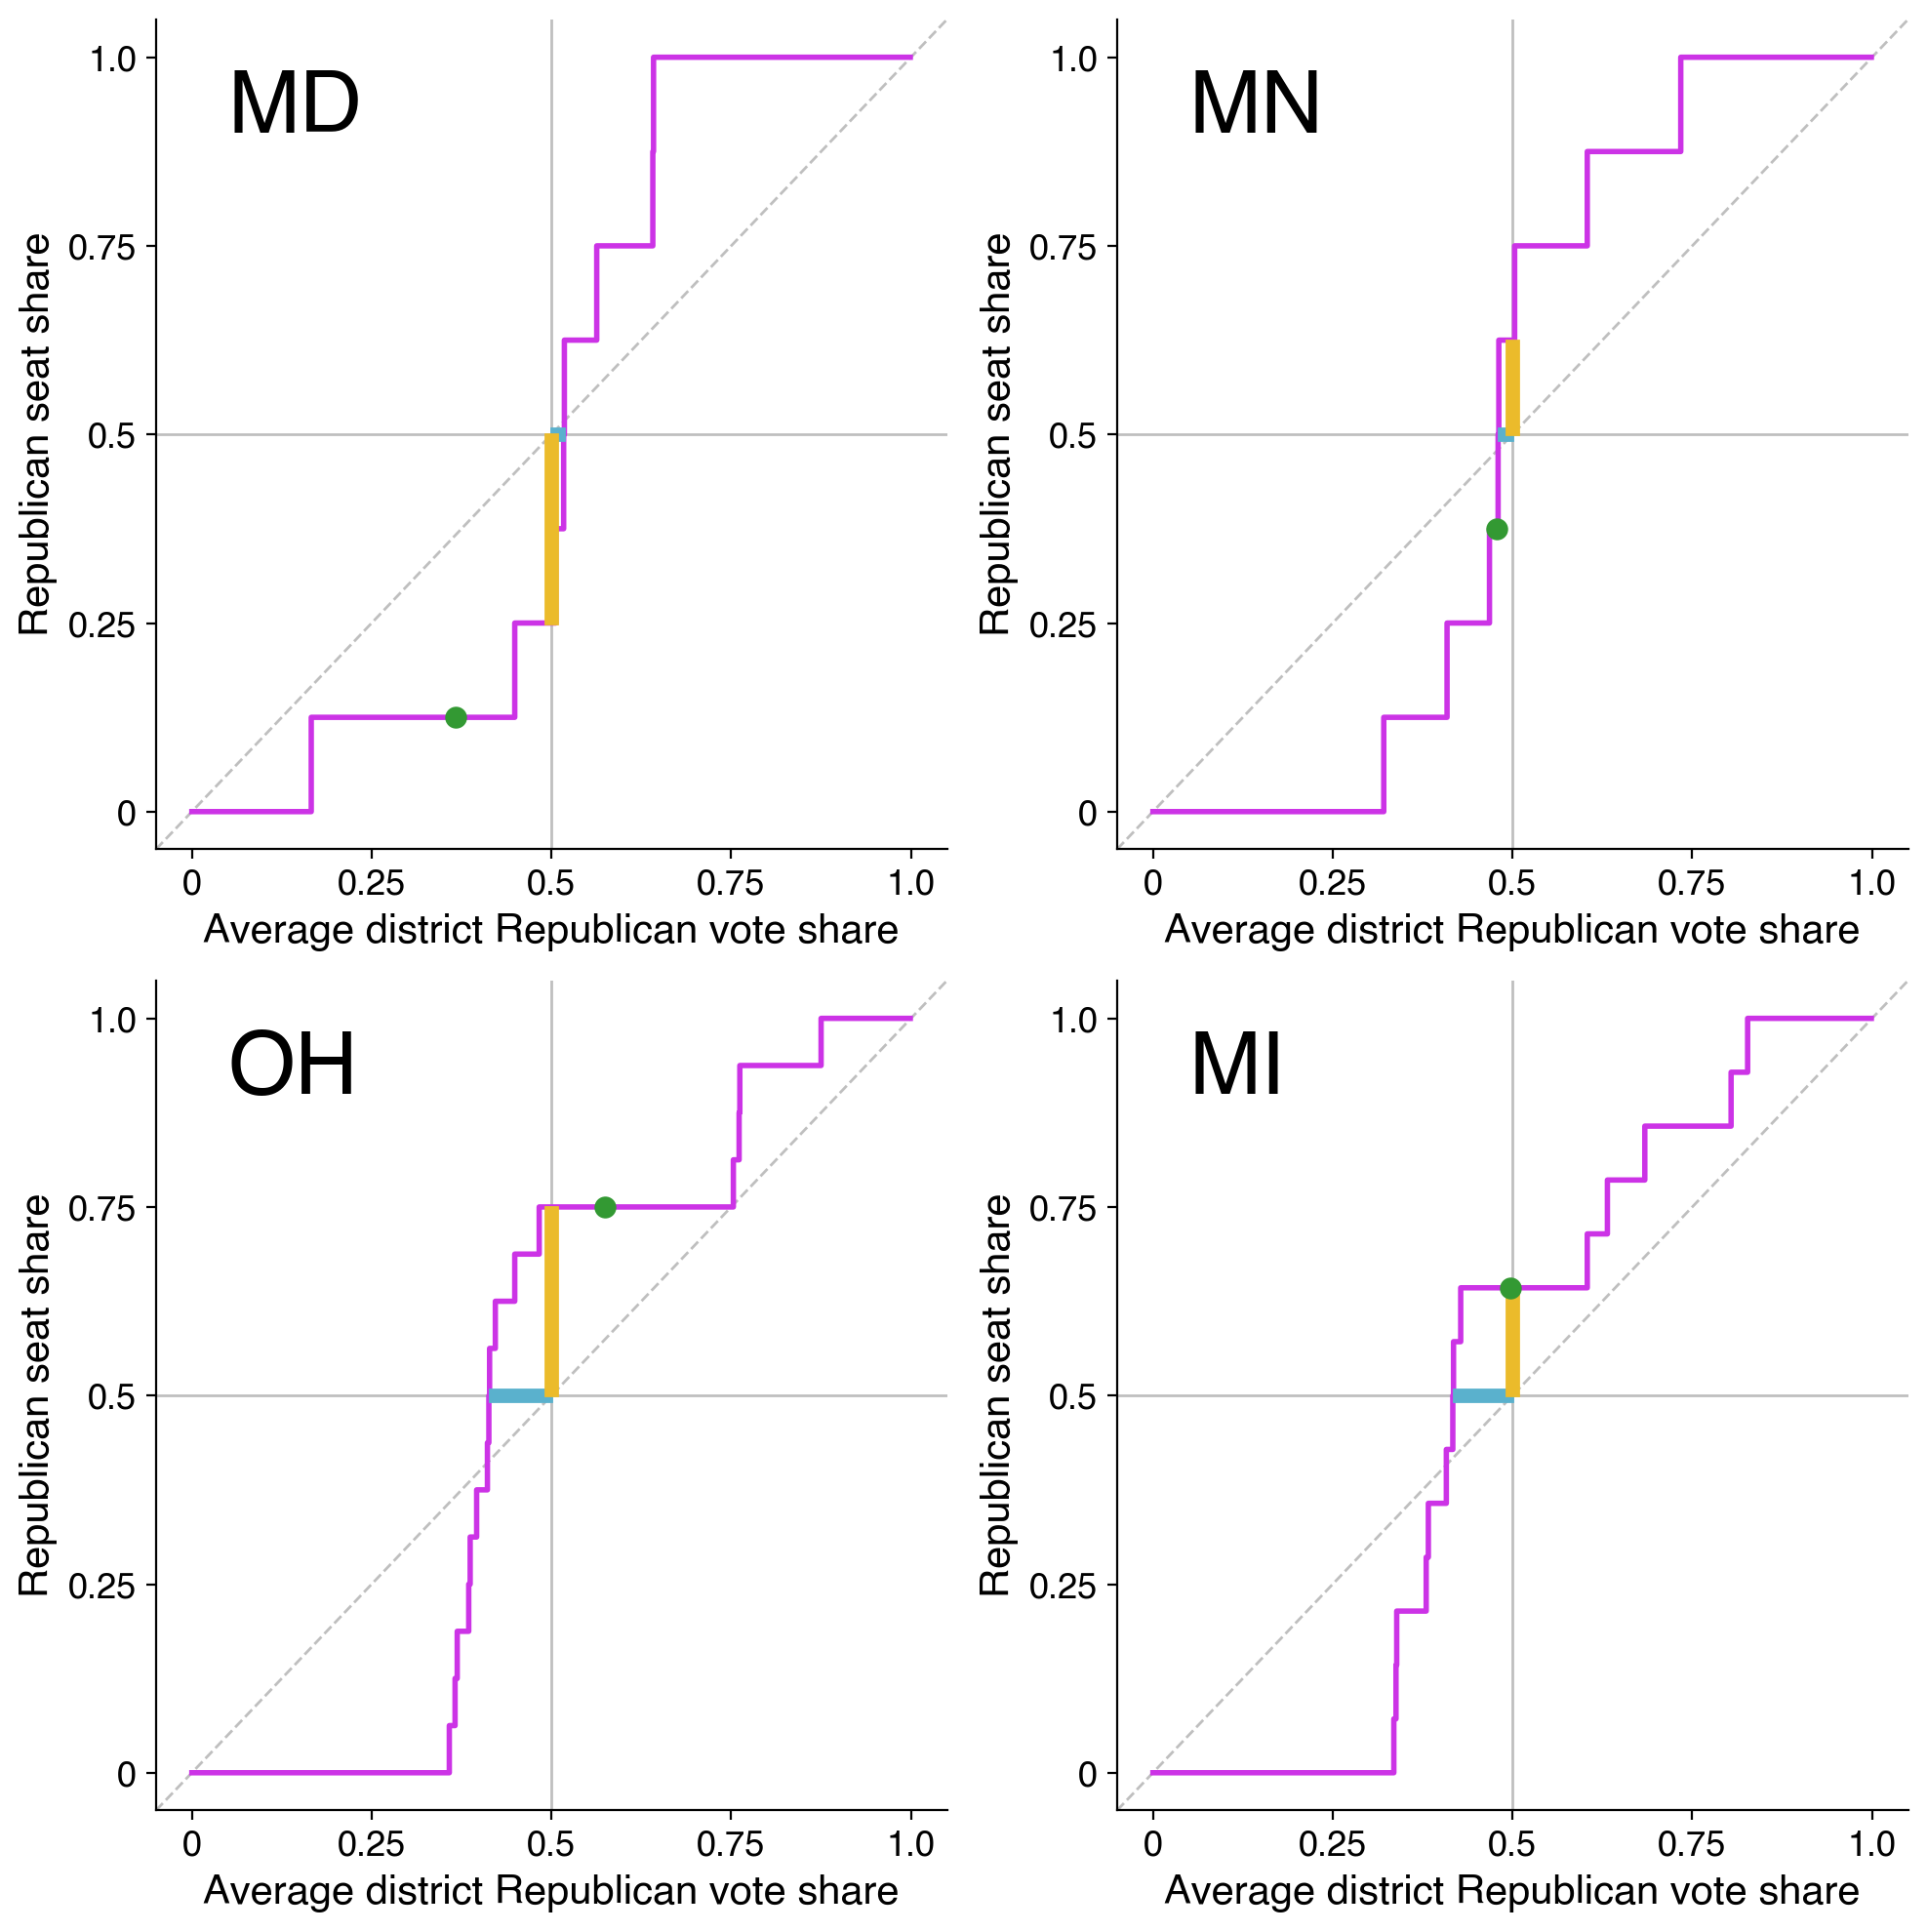

In [4]:
# Plot measures of partisan symmetry relating to the (0.5, 0.5) point

year = 2016
actual_vote_share_list = []
actual_seat_share_list = []
vote_list = []
seat_list = []

for state in states:
    rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, year)
    rep_vote_shares_by_district, dem_vote_shares_by_district = votes_to_shares_by_district(rep_votes_by_district, dem_votes_by_district)
    rep_vote_share, rep_seat_share = district_vote_shares_to_vote_and_seat_shares(rep_vote_shares_by_district)
    actual_vote_share_list.append(rep_vote_share)
    actual_seat_share_list.append(rep_seat_share)

    ups_votes, ups_seats = ups_linear(rep_vote_shares_by_district)

    vote_list.append(ups_votes) 
    seat_list.append(ups_seats)

plot_mean_median_and_partisan_bias_grid(states,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list)

plt.tight_layout()
plt.savefig("outputs/mean_median_partisan_bias.png", dpi=500)


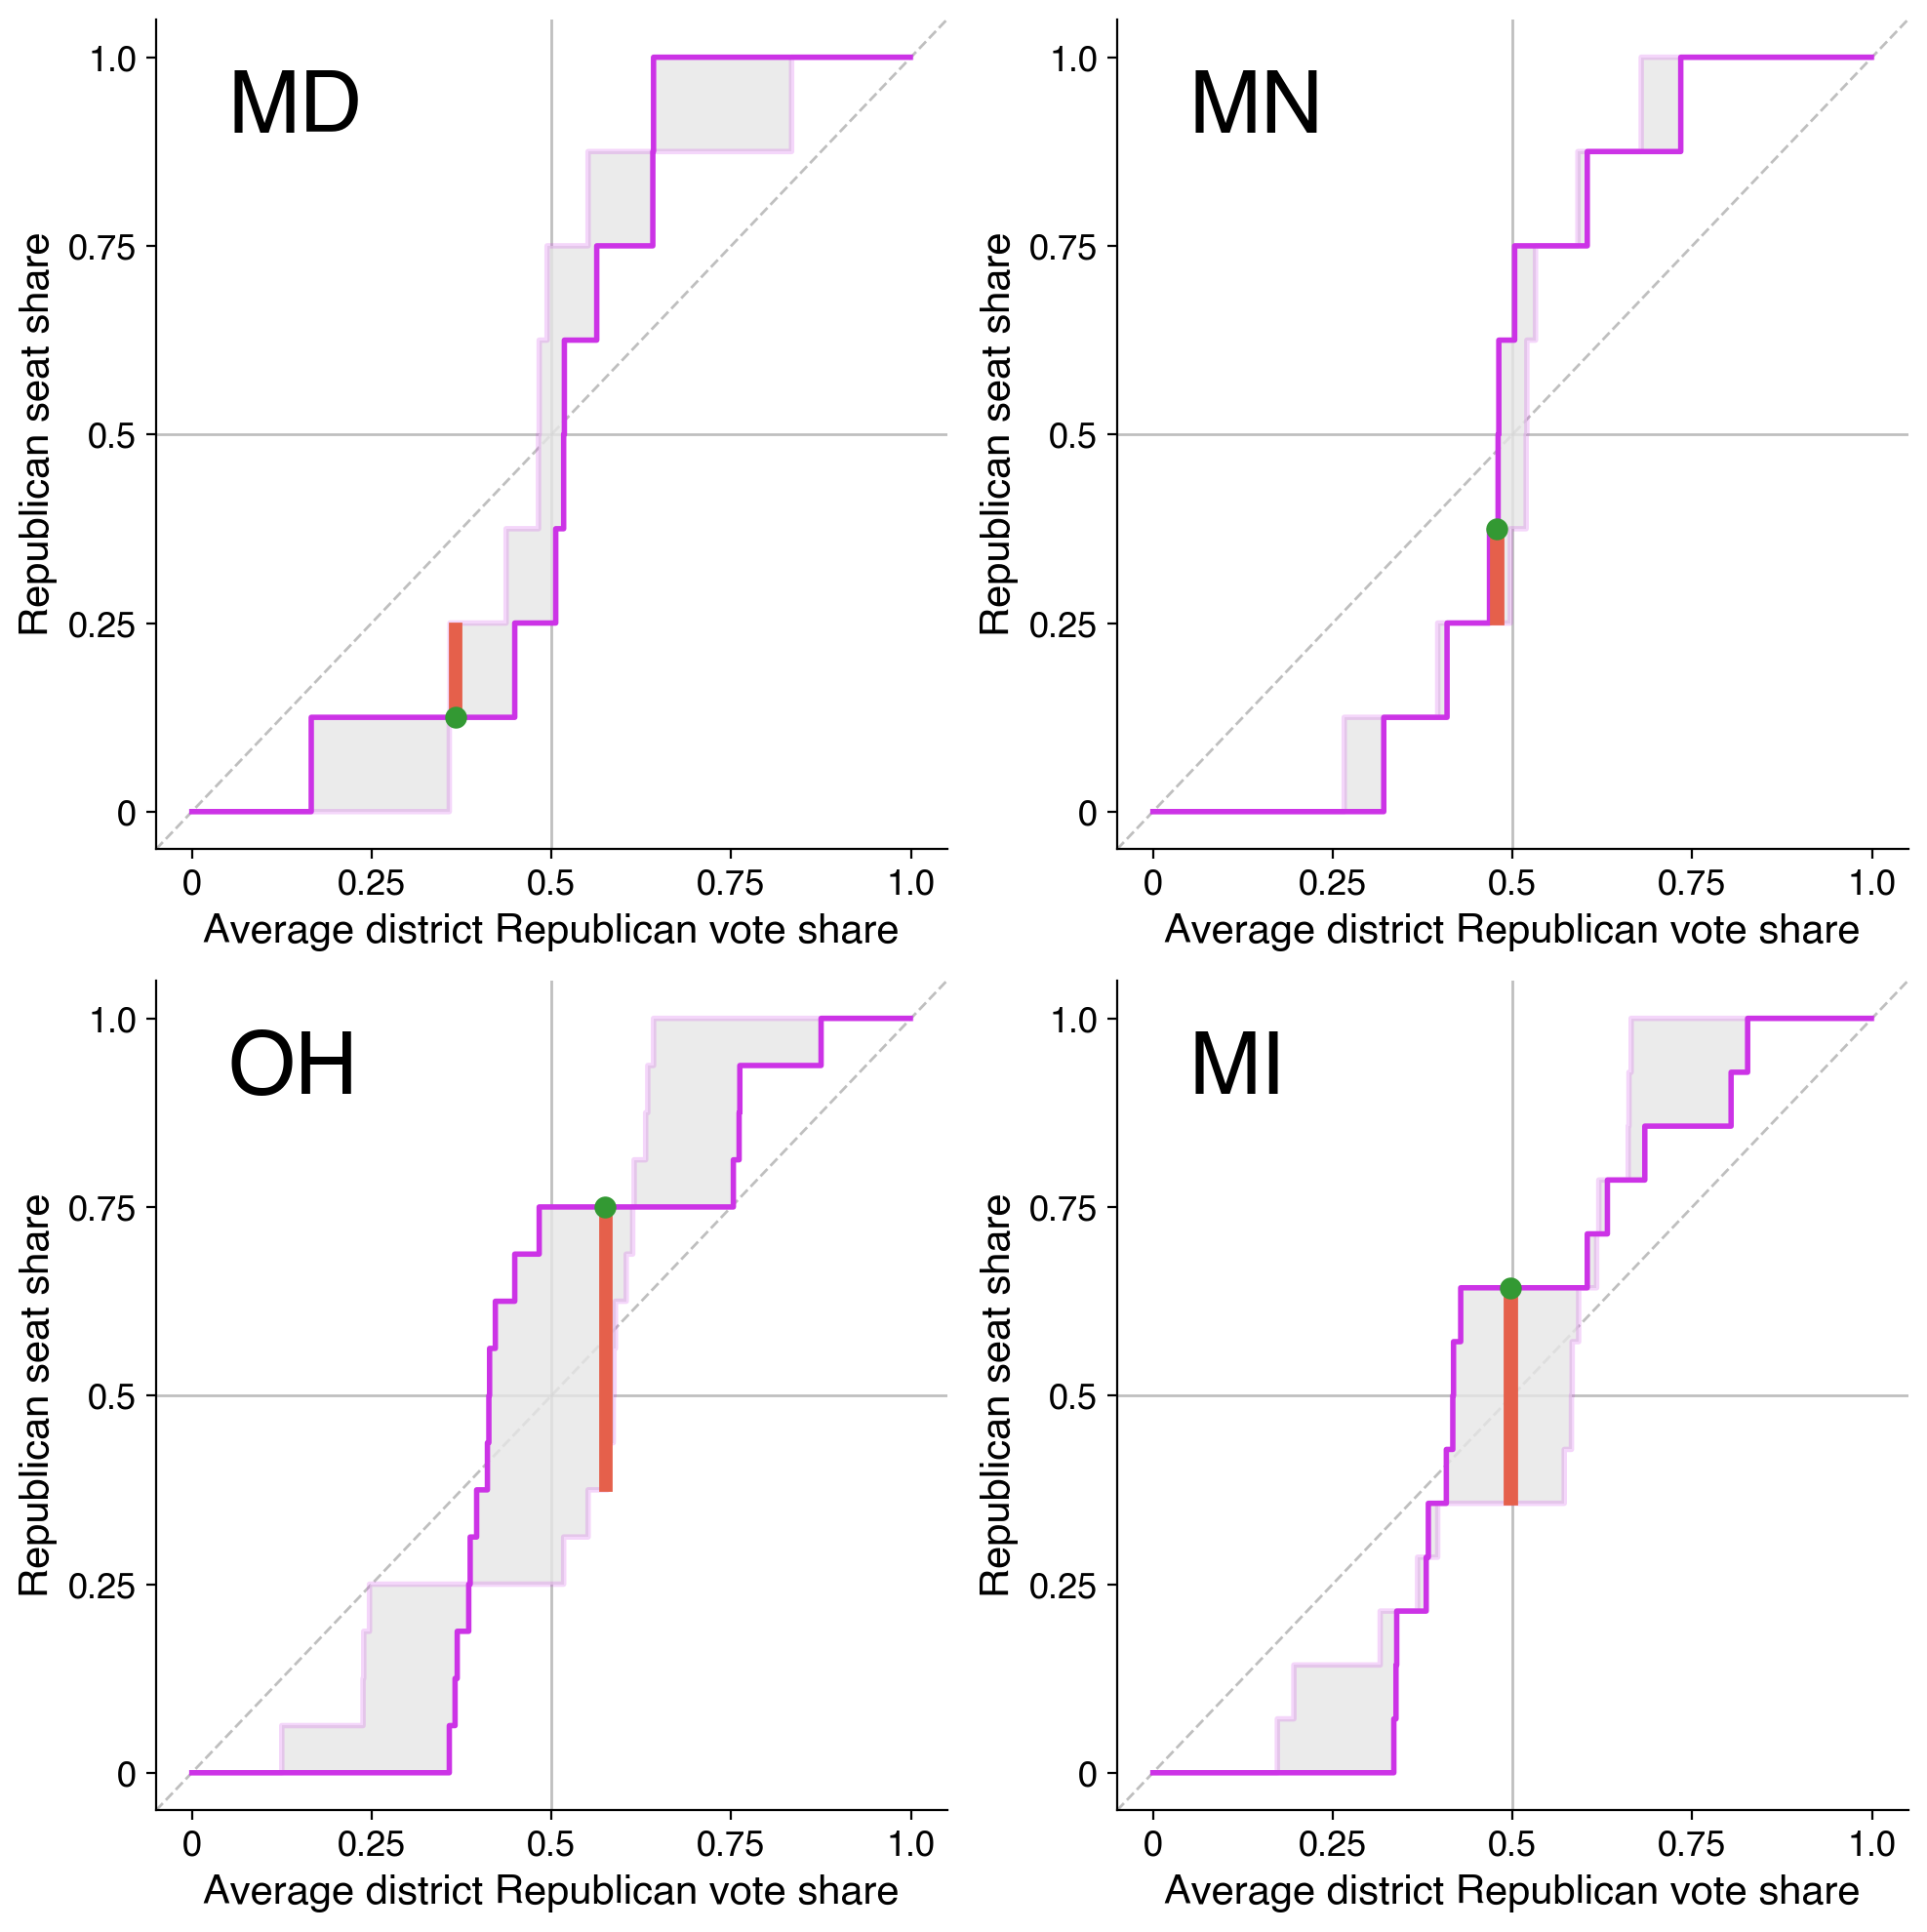

In [5]:
# Plot measures of partisan symmetry relating to the 180 degree rotation


plot_symmetric_point_and_shading_grid(states,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list)

plt.tight_layout()
plt.savefig("outputs/area_and_symmetry.png", dpi=500)


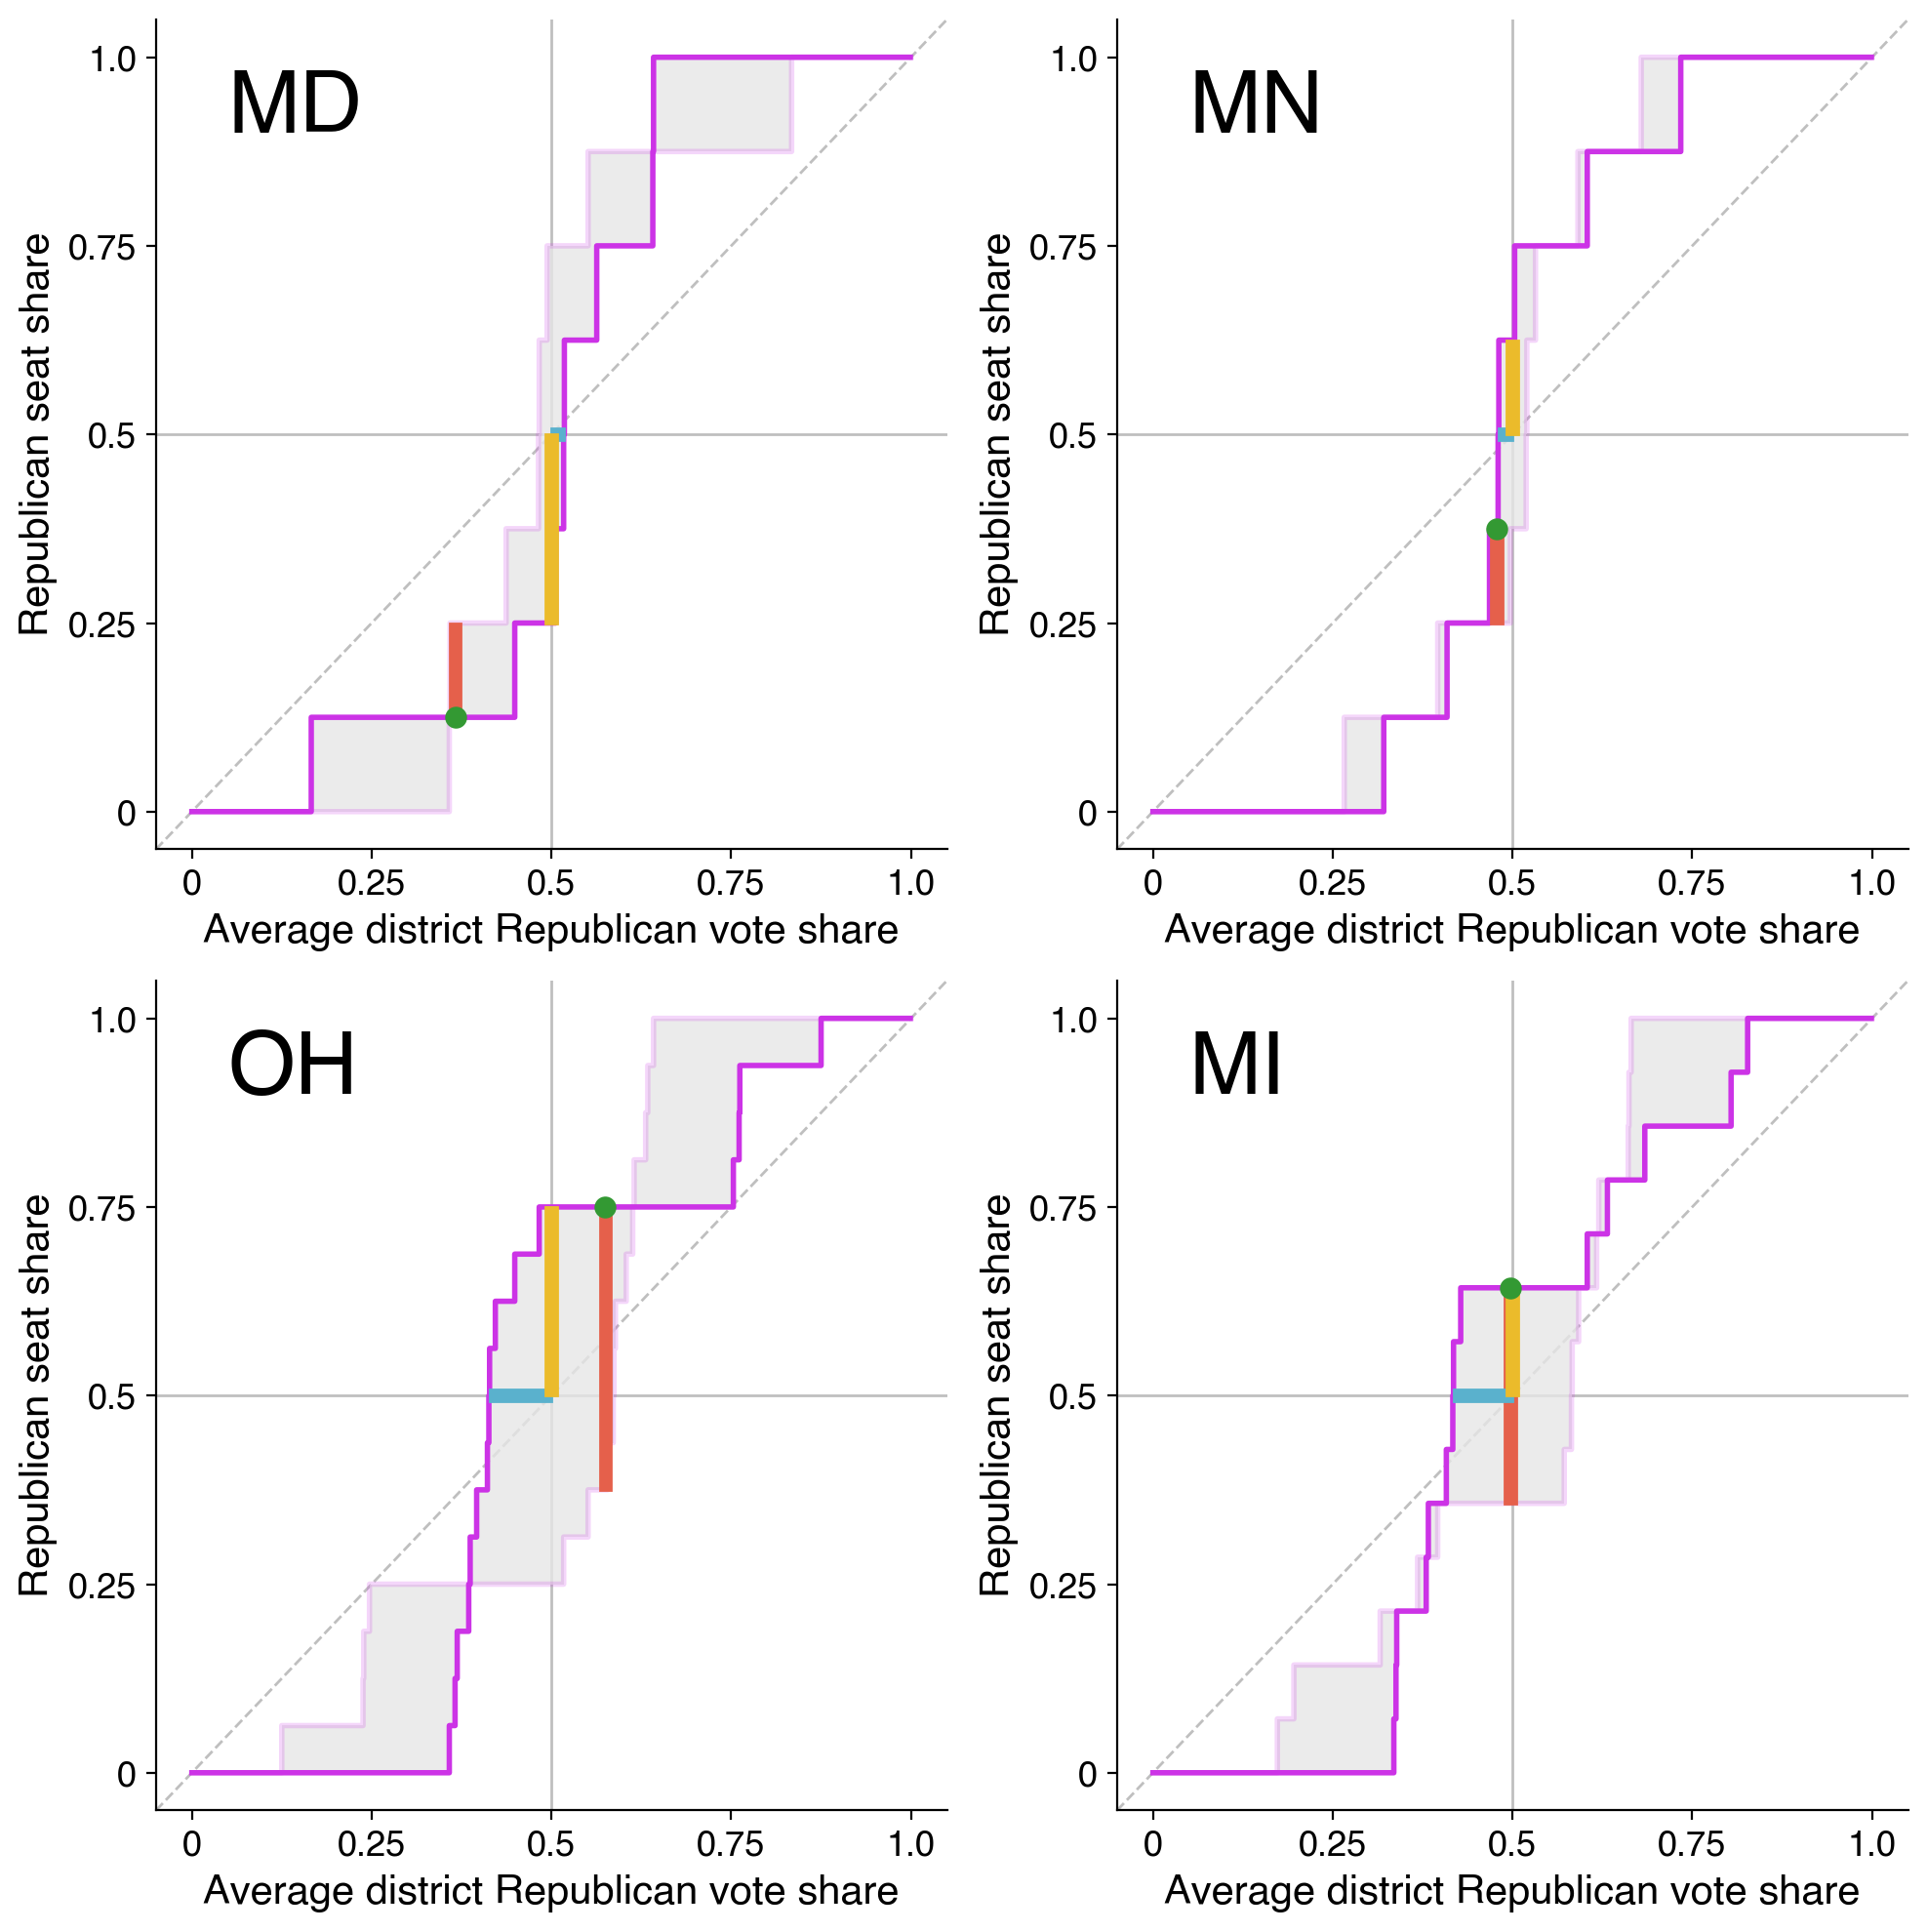

In [6]:
# Plot all the measures of partisan symmetry

plot_all_measures_grid(states,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list)

plt.tight_layout()
plt.savefig("outputs/all_measures.png", dpi=500)


In [7]:
make_partisan_symmetry_table(states,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list,latex=True)

\begin{tabular}{c|c|c|c|c}\n State & $\beta$-average & $\beta(\VO)$ & $\beta(.5)$ & Mean-median \\
& on $[0.4,0.6]$  &              &            & score\\
MD & 0.1 & 0.12 & 0.25 &  -0.02 \\ 
MN & 0.03 & -0.12 & -0.12 &  0.02 \\ 
OH & 0.16 & -0.38 & -0.25 &  0.09 \\ 
MI & 0.1 & -0.29 & -0.14 &  0.08 \\ 
\hline 
 \end{tabular}


\begin{tabular}{c|c|c|c|c}\n State & $\beta$-average & $\beta(\VO)$ & $\beta(.5)$ & Mean-median \\
& on $[0.4,0.6]$  &              &            & score\\
2012 & 0.02 & -0.12 & 0.0 &  0.0 \\ 
2014 & 0.05 & -0.12 & 0.0 &  0.0 \\ 
2016 & 0.03 & -0.12 & -0.12 &  0.02 \\ 
2018 & 0.06 & -0.12 & -0.12 &  0.03 \\ 
\hline 
 \end{tabular}


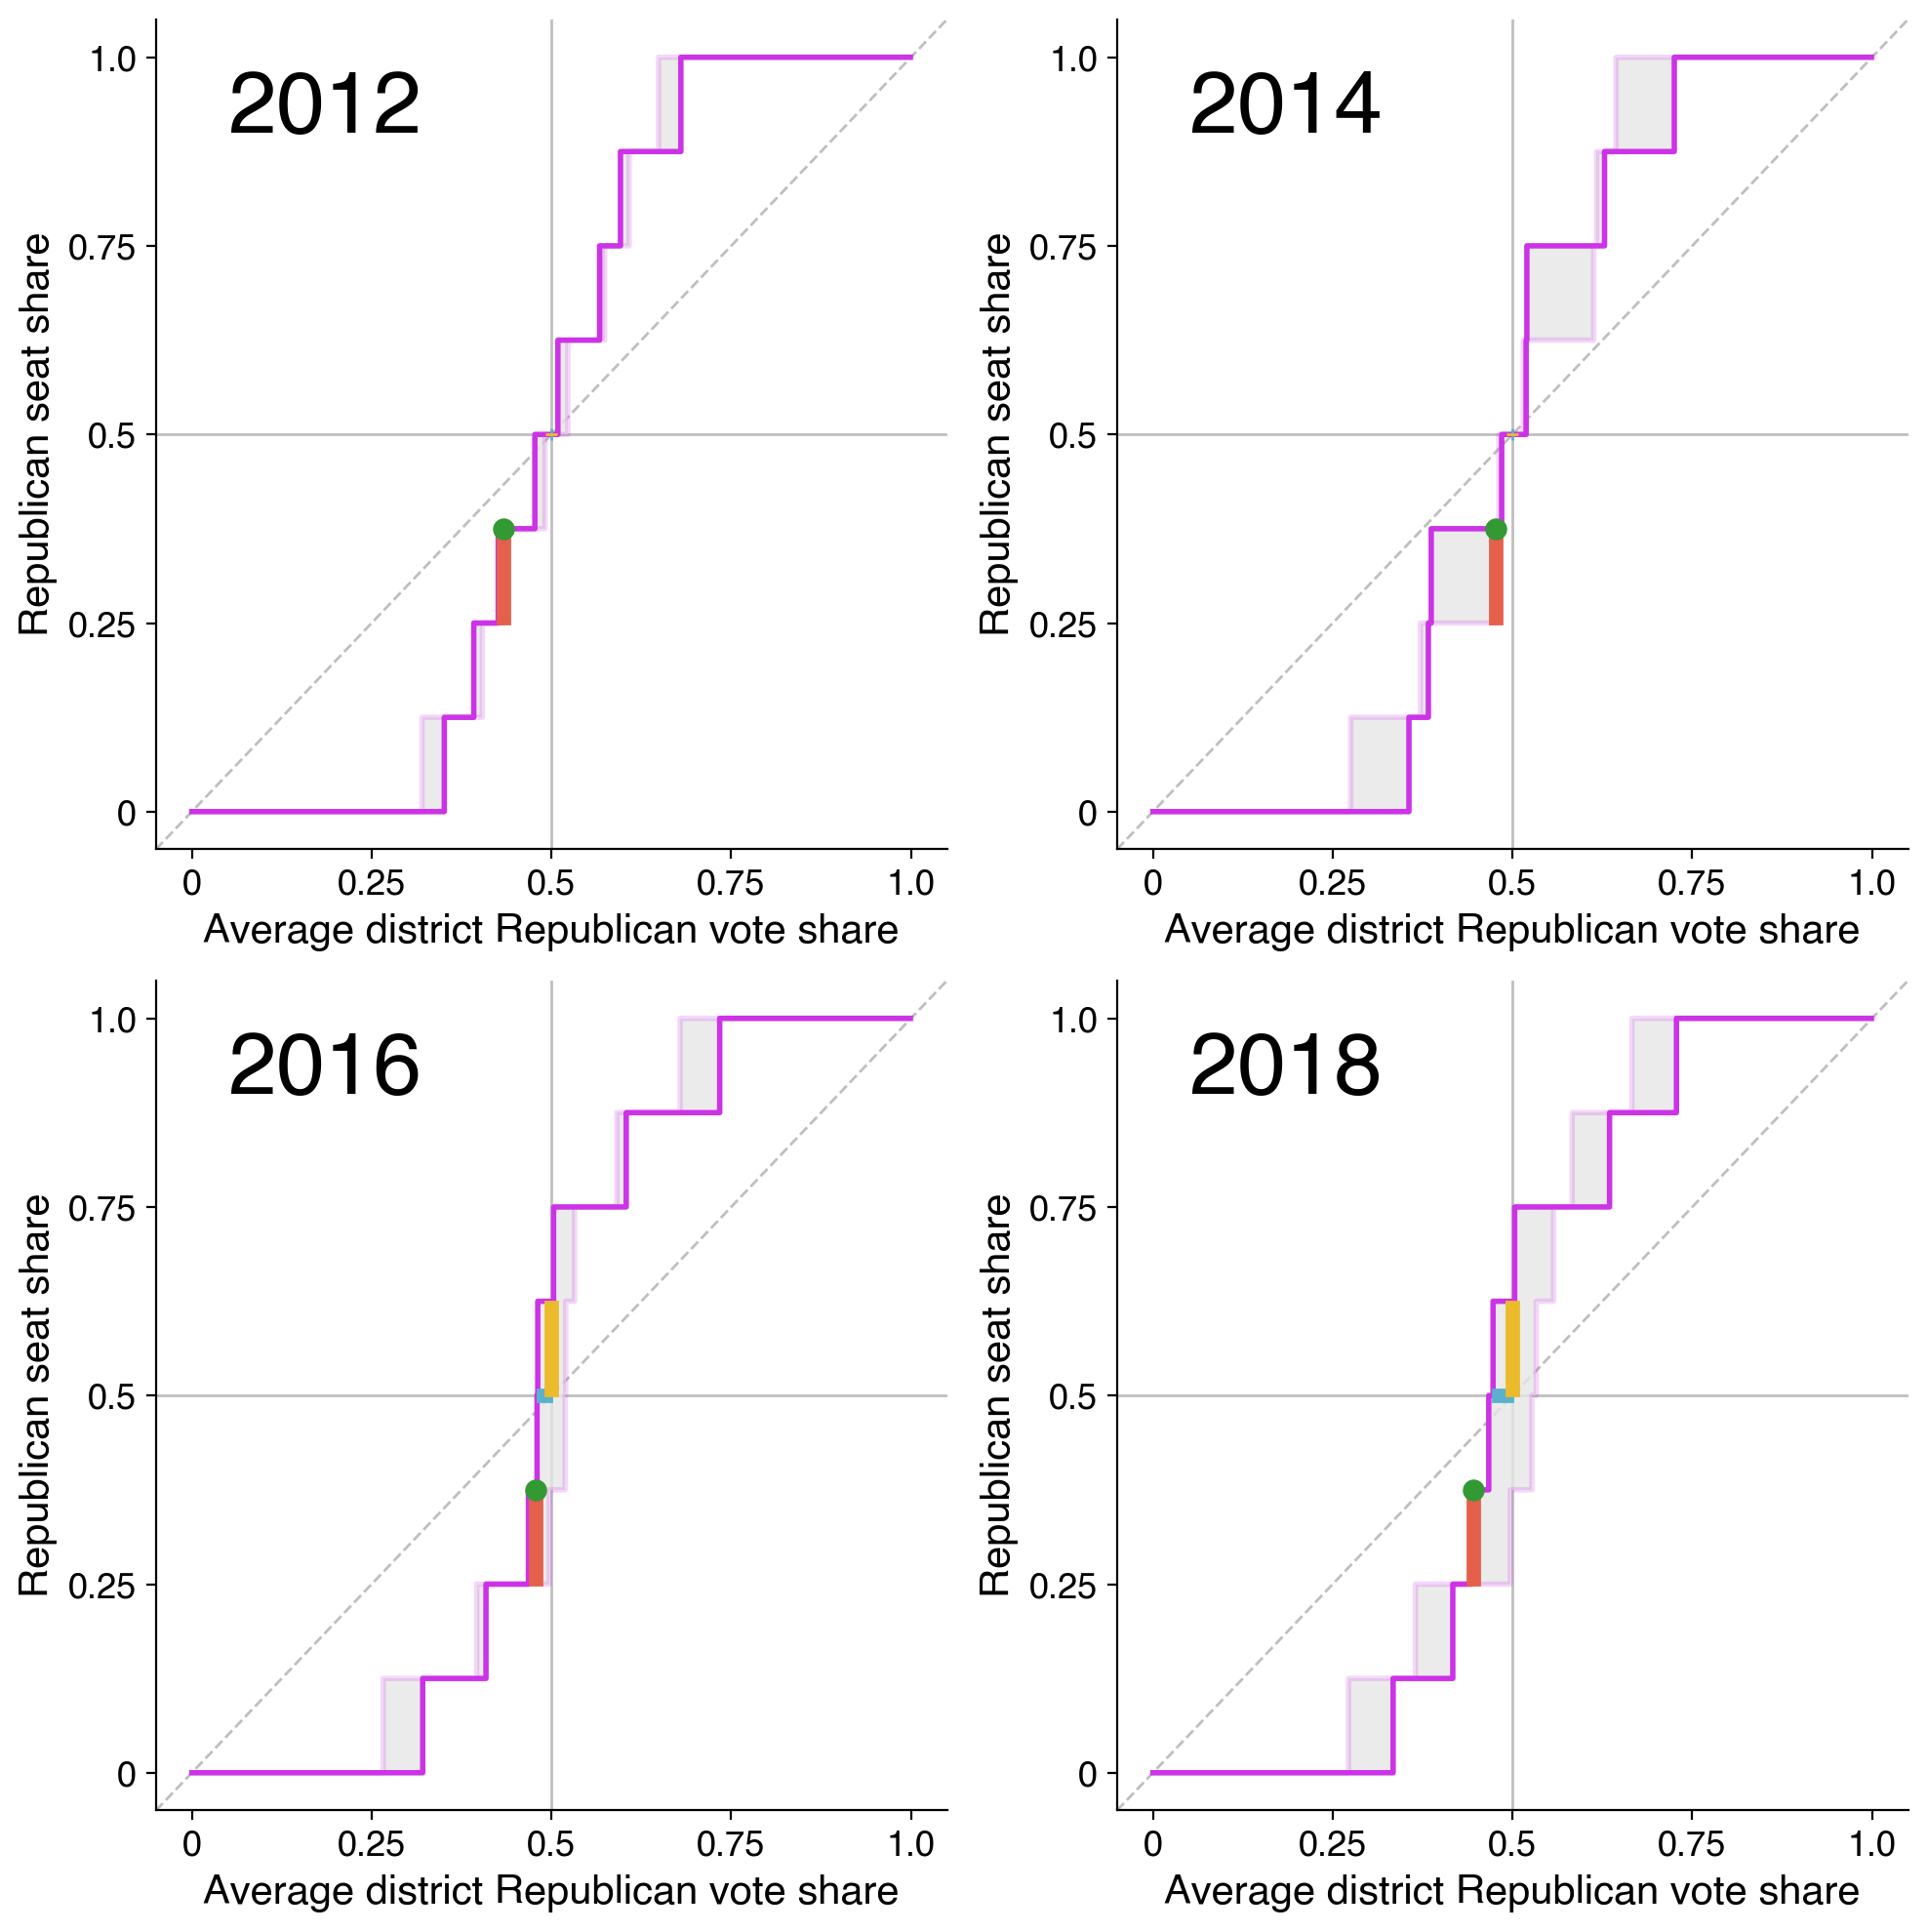

In [8]:
# Plot year by year election results in MN, showing partisan symmetry measures

state = "MN"
years = ["2012", "2014", "2016", "2018"]
actual_vote_share_list = []
actual_seat_share_list = []
vote_list = []
seat_list = []

for year in years:
    rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, int(year))
    rep_vote_shares_by_district, dem_vote_shares_by_district = votes_to_shares_by_district(rep_votes_by_district, dem_votes_by_district)
    rep_vote_share, rep_seat_share = district_vote_shares_to_vote_and_seat_shares(rep_vote_shares_by_district)
    actual_vote_share_list.append(rep_vote_share)
    actual_seat_share_list.append(rep_seat_share)

    ups_votes, ups_seats = ups_linear(rep_vote_shares_by_district)

    vote_list.append(ups_votes) 
    seat_list.append(ups_seats)

plot_all_measures_grid(years,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list)
plt.tight_layout()
plt.savefig("outputs/stability.png", dpi=500)

make_partisan_symmetry_table(years,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list,latex=True)

In [9]:
state = "MN"
year = 2016

rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, year)

make_wasted_votes_table_for_state(rep_votes_by_district, dem_votes_by_district, latex=True)

\begin{tabular}{r|rrrrrr} {\bf District} & {\bf Votes for R} & {\bf Votes for D} & {\bf Total votes} & {\bf Needed to win}& {\bf Wasted by R} & {\bf Wasted by D} \\ \hline
1 & 166,524 & 169,071 & 335,595 & 167,798 & 166,524 &  1,273 \\ 
2 & 173,970 & 167,315 & 341,285 & 170,643 & 3,327 &  167,315 \\ 
3 & 223,075 & 169,238 & 392,313 & 196,157 & 26,918 &  169,238 \\ 
4 & 121,033 & 203,299 & 324,332 & 162,166 & 121,033 &  41,133 \\ 
5 & 80,660 & 249,957 & 330,617 & 165,309 & 80,660 &  84,648 \\ 
6 & 235,385 & 123,010 & 358,395 & 179,198 & 56,187 &  123,010 \\ 
7 & 156,944 & 173,572 & 330,516 & 165,258 & 156,944 &  8,314 \\ 
8 & 177,088 & 179,097 & 356,185 & 178,093 & 177,088 &  1,004 \\ 
\hline
\textit{Total} & 1,334,679 & 1,434,559 & 2,769,238 & & 788,681 & 595,935
\end{tabular}

 Efficiency gap:  -0.0696


In [10]:
make_competitiveness_table_for_state(rep_votes_by_district, dem_votes_by_district, latex=True)

\begin{tabular}{c|c|c|c|c|c} 
 &  &   &   &   \multicolumn{2}{c}{\textbf{Margin of victory...}} \\
\textbf{District}   &  \textbf{Total votes}   &   \textbf{\% Republican} &  \textbf{Winner} & \bf{in \%}  &   \textbf{in votes}\\ 
 \hline
1 & 335,595 & 49.6\% & D & 0.8\% & 2,547 \\
2 & 341,285 & 51.0\% & R & 1.9\% & 6,655 \\
3 & 392,313 & 56.9\% & R & 13.7\% & 53,837 \\
4 & 324,332 & 37.3\% & D & 25.4\% & 82,266 \\
5 & 330,617 & 24.4\% & D & 51.2\% & 169,297 \\
6 & 358,395 & 65.7\% & R & 31.4\% & 112,375 \\
7 & 330,516 & 47.5\% & D & 5.0\% & 16,628 \\
8 & 356,185 & 49.7\% & D & 0.6\% & 2,009 \\
\hline 
 Total & 2769238 & 48.2\% & 3R/5D &   &  \\
\end{tabular}


In [11]:
make_table_comparing_eg_expressions(['MD','MI','MN','MO','NC','NJ','OH','TN'],latex=True)

\begin{tabular}{c|rc} {\bf State} & {\bf EG} & $S-2V+\frac 12$\\ 
 \hline
MD & -0.11 &  -0.12 \\ 
MI & 0.15 &  0.13 \\ 
MN & -0.07 &  -0.09 \\ 
MO & 0.06 &  0.04 \\ 
NC & 0.19 &  0.2 \\ 
NJ & 0.06 &  -0.0 \\ 
OH & 0.11 &  0.09 \\ 
TN & -0.01 &  -0.02 \\ 
\end{tabular}


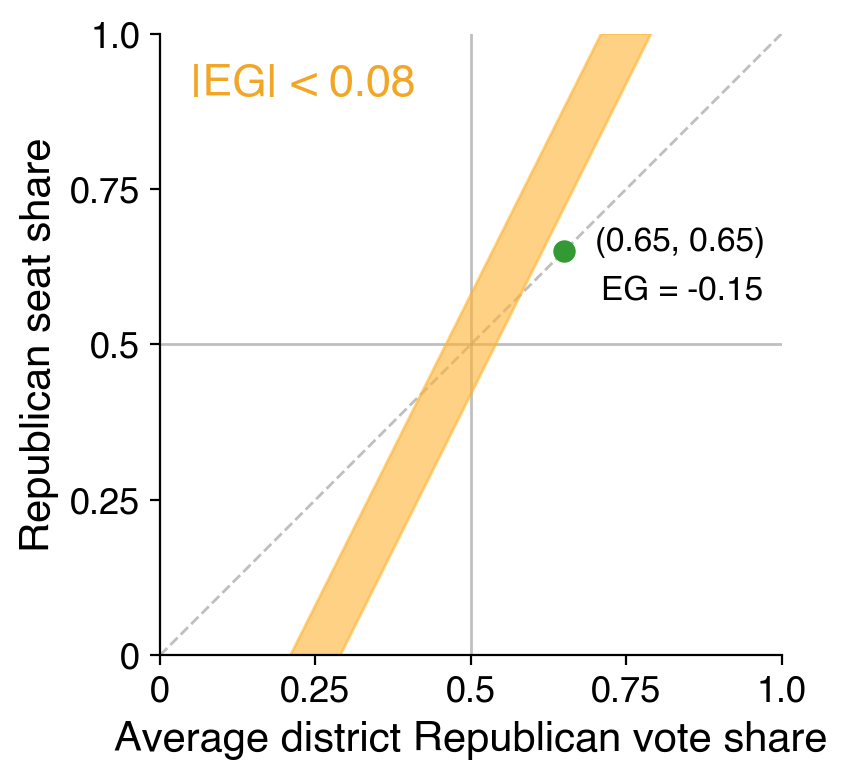

In [12]:
# Plot efficiency gap diagram

plot_eg_band()
plt.tight_layout()
plt.savefig("outputs/efficiency_gap.png", dpi=500)



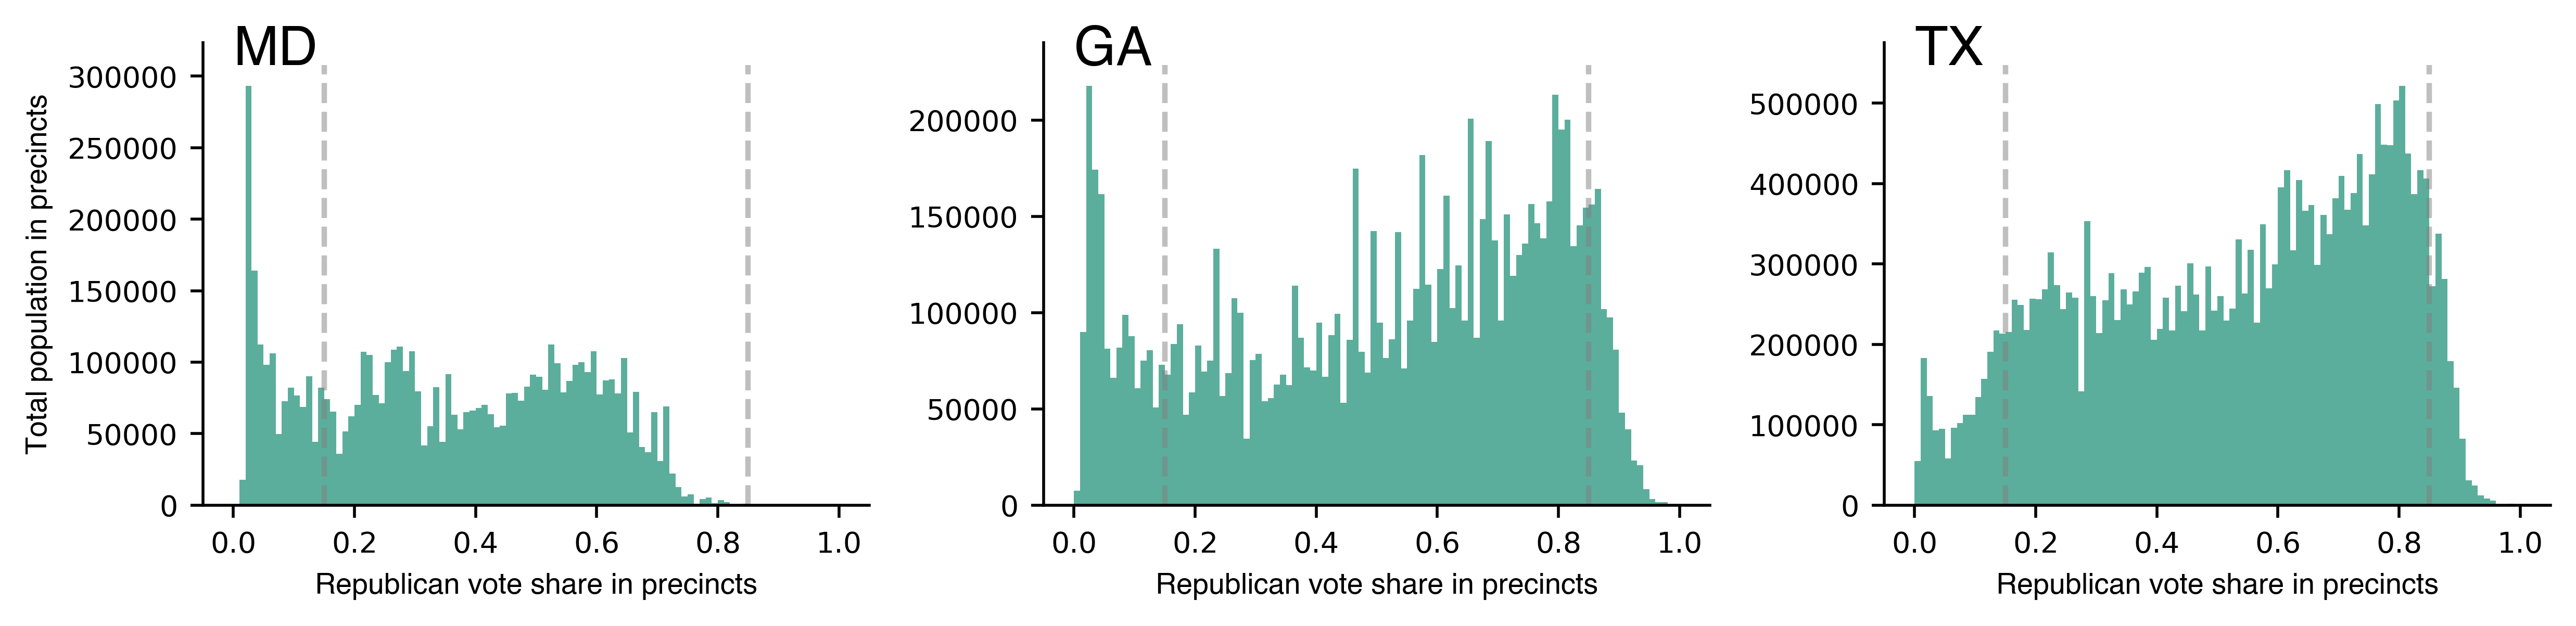

In [13]:
# Plot histograms of precinct populations in different states

plot_histogram_row(["MD", "GA", "TX"])
plt.tight_layout()
plt.savefig("outputs/precinct_histograms.png", dpi=500)


